In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px


df = pd.read_csv("data/final_matches.csv", sep=",")

In [8]:
df.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,team,season
0,2020-09-12,12:30,Premier League,Matchweek 1,Sat,Away,W,3,0,Fulham,...,Match Report,NaN,13.0,5.0,14.1,2.0,0,0,Arsenal,2021
1,2020-09-19,20:00,Premier League,Matchweek 2,Sat,Home,W,2,1,West Ham,...,Match Report,NaN,7.0,3.0,14.8,0.0,0,0,Arsenal,2021
2,2020-09-28,20:00,Premier League,Matchweek 3,Mon,Away,L,1,3,Liverpool,...,Match Report,NaN,4.0,3.0,15.0,0.0,0,0,Arsenal,2021
3,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,2,1,Sheffield Utd,...,Match Report,NaN,6.0,5.0,16.3,0.0,0,0,Arsenal,2021
4,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,0,1,Manchester City,...,Match Report,NaN,11.0,3.0,18.4,2.0,0,0,Arsenal,2021


In [9]:
teams = df[["team"]].drop_duplicates()
victorias = df[df["result"] == "W"]["team"].value_counts()

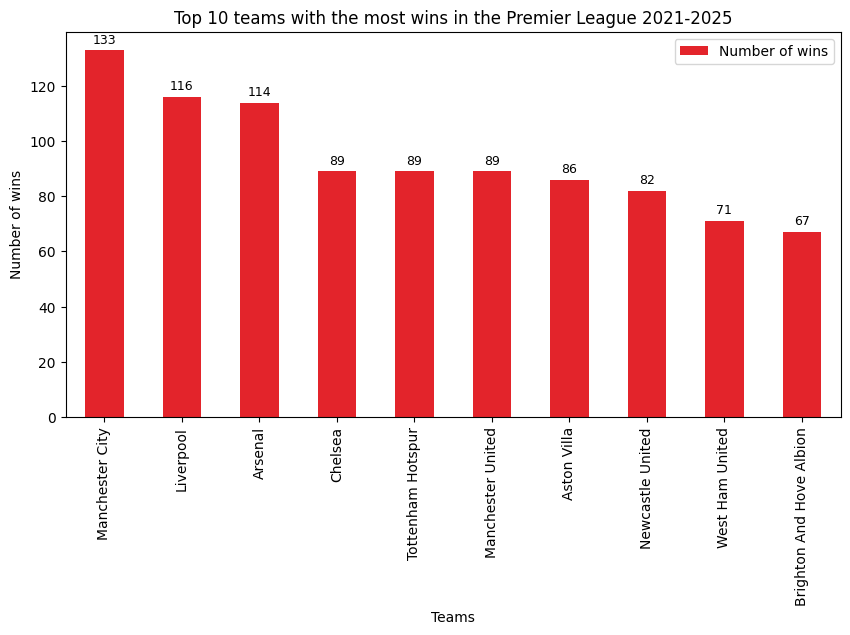

In [10]:
teams_graf = pd.DataFrame(
    {
        "teams": teams["team"].values,
        "Number of wins": teams["team"].map(victorias).fillna(0).astype(int),
    }
)
teams_graf = teams_graf.sort_values(by="Number of wins", ascending=False).head(10)

ax = teams_graf.plot(
    x="teams",
    y="Number of wins",
    kind="bar",
    figsize=(10, 5),
    color="#E3242B",
    legend=True,
)

ax.bar_label(ax.containers[0], padding=3, fontsize=9)
plt.title("Top 10 teams with the most wins in the Premier League 2021-2025")
plt.xlabel("Teams")
plt.ylabel("Number of wins")
plt.show()

In [ ]:
formations = pd.concat(
    [df["formation"].replace("◆", ""), df["opp formation"].replace("◆", "")],
    ignore_index=True,
)
formations = formations.str.replace("◆", "")
formations = formations.value_counts().reset_index()
formations.columns = ["formation", "Wins"]
formations["Percentage"] = (formations["Wins"] / formations["Wins"].sum()) * 100
formations

,formation,Wins,Percentage
0,4-2-3-1,2660,35.000000
1,4-3-3,1612,21.210526
2,3-4-3,988,13.000000
3,4-4-2,704,9.263158
4,3-5-2,344,4.526316
5,4-1-4-1,316,4.157895
6,4-4-1-1,200,2.631579
7,5-3-2,150,1.973684
8,3-4-1-2,138,1.815789
9,5-4-1,136,1.789474


In [ ]:
top5 = formations.head(5).copy()

fig = px.pie(top5, names="formation", values="Wins", hole=0.5)

fig.update_traces(
    texttemplate="%{label}<br>%{customdata:.1f}%",
    textposition="inside",
    customdata=top5["Percentage"],
    hovertemplate=(
        "<b>%{label}</b><br>"
        "Wins: %{value}<br>"
        "Percentage: %{customdata:.2f}%"
        "<extra></extra>"
    ),
)

fig.show()